In [1]:
import numpy as np
import heapq
import random
import matplotlib.pyplot as plt

In [2]:
class knn_regressor():
  def __init__(self, k):
    self.k = k

  def train(self, X,y):
    self.X = X
    self.y = y
    self.n = len(self.X)

  def predict(self, x):
    heap = []

    for i in range(self.n):
      d = abs(x - self.X[i])
      heapq.heappush(heap, (-d, i))
      if len(heap) > self.k:
        heapq.heappop(heap)

    value = 0.0
    for i in range(self.k):
      _, index = heapq.heappop(heap)
      value += self.y[index]

    return value/self.k


In [3]:
size = 100
errors = np.random.normal(0, .1, size)
X = np.linspace(0.0,10.0, size)
y = np.cos(X) + errors
indices = random.choices(range(size), k = 33)

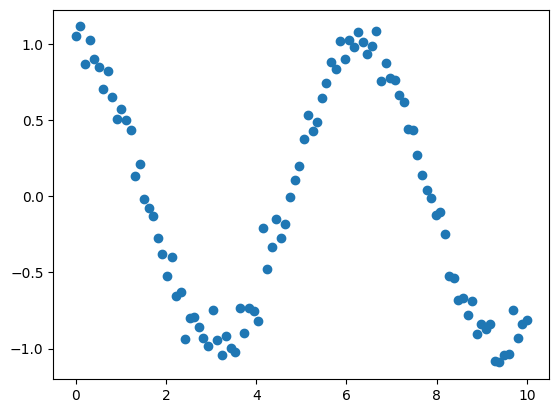

In [4]:
plt.scatter(X,y)

In [5]:
X_train, y_train = X[indices], y[indices]

In [6]:
model = knn_regressor(3)
model.train(X_train, y_train)

In [7]:
y_predict = [model.predict(x) for x in X]

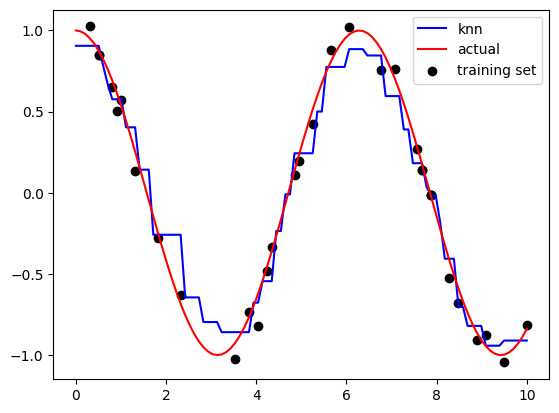

In [8]:
plt.plot(X,y_predict,color = "blue", label = "knn")
plt.plot(X,np.cos(X), c = "red", label = "actual")
plt.scatter(X_train, y_train,c = "black", label = "training set")
plt.legend()